### Program on Time Series: GroupBy Mechanics to display in data vector, multivariate time series and forecasting formats

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# 1. Create a sample time series dataset
np.random.seed(42)
dates = pd.date_range(start = "2022-01-01", periods = 24, freq = "ME") #2 years of monthly data
data = {
    "Date": dates,
    "Sales": np.random.randint(200, 500, size=24),
    "Expenses": np.random.randint(100, 300, size=24)
}

df =pd.DataFrame(data)
df.set_index("Date", inplace = True)
df = df.asfreq('ME')
print("Original Time Series Data\n", df.head())

Original Time Series Data
             Sales  Expenses
Date                       
2022-01-31    302       269
2022-02-28    470       287
2022-03-31    306       114
2022-04-30    271       289
2022-05-31    388       289


In [25]:
# 2. Group by Mechanics
# Group data by year and calculate total sales and expenses
df["Year"] = df.index.year
yearly_summary = df.groupby("Year")[["Sales", "Expenses"]].sum()
print("\nYearly Summary (GroupBy):\n", yearly_summary)


Yearly Summary (GroupBy):
       Sales  Expenses
Year                 
2022   3931      2715
2023   4470      2047


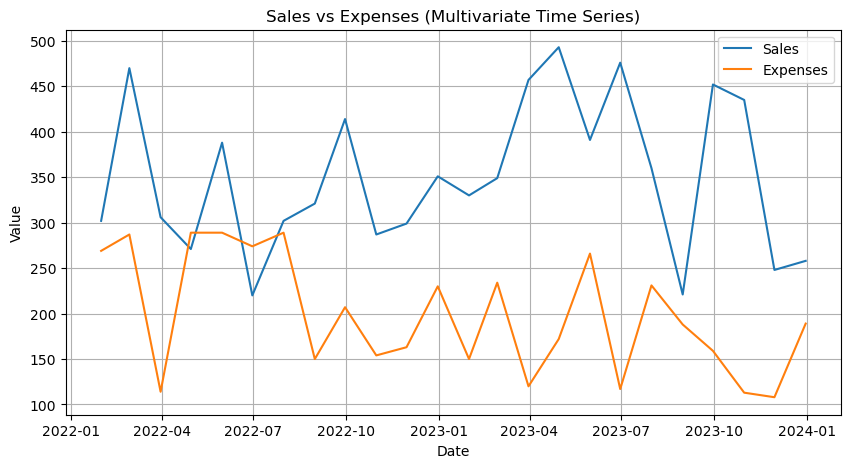

In [33]:
# 3. Multivariate Time Series Visualisation
plt.figure(figsize = (10,5))
plt.plot(df.index, df["Sales"], label = "Sales")
plt.plot(df.index, df["Expenses"], label = "Expenses")
plt.title("Sales vs Expenses (Multivariate Time Series)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()


Forecasted Sales for Next 6 Months:
 2024-01-31    372.163752
2024-02-29    333.577859
2024-03-31    300.811208
2024-04-30    334.681092
2024-05-31    332.742211
2024-06-30    318.289319
Freq: ME, Name: predicted_mean, dtype: float64


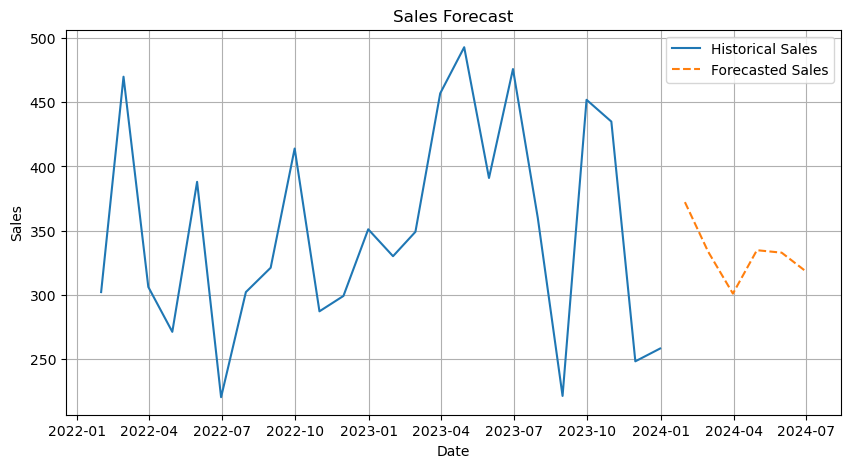

In [54]:
# 4. Forecasting using ARIMA

# Build ARIMA model on Sales data
model = ARIMA(df["Sales"], order = (2,1,2)) #ARIMA(p,d,q)
model_fit = model.fit()

# Forecast for next 6 months
forecast = model_fit.forecast(steps = 6)
print("\nForecasted Sales for Next 6 Months:\n", forecast)

# Plot forecast
plt.figure(figsize = (10,5))
plt.plot(df.index, df["Sales"], label = "Historical Sales")
forecast_dates = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=6, freq="ME")
plt.plot(forecast_dates, forecast, label="Forecasted Sales", linestyle="--")
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()